# Graph Representation
## 1. Create a random  graph with bellow conditions:
 + This is a weighted and directed graph.
 + The number of nodes: 10.
 + The number of edges: 15.
 + Weight of each edge is the random float number from 1 to 10.
 + Each node has a label which is the uppercase alphabet character from A to J.
 + Use can use networkx or define your own Graph class.



In [4]:
# !pip install networkx pandas numpy matplotlib openpyxl

import networkx as nx
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

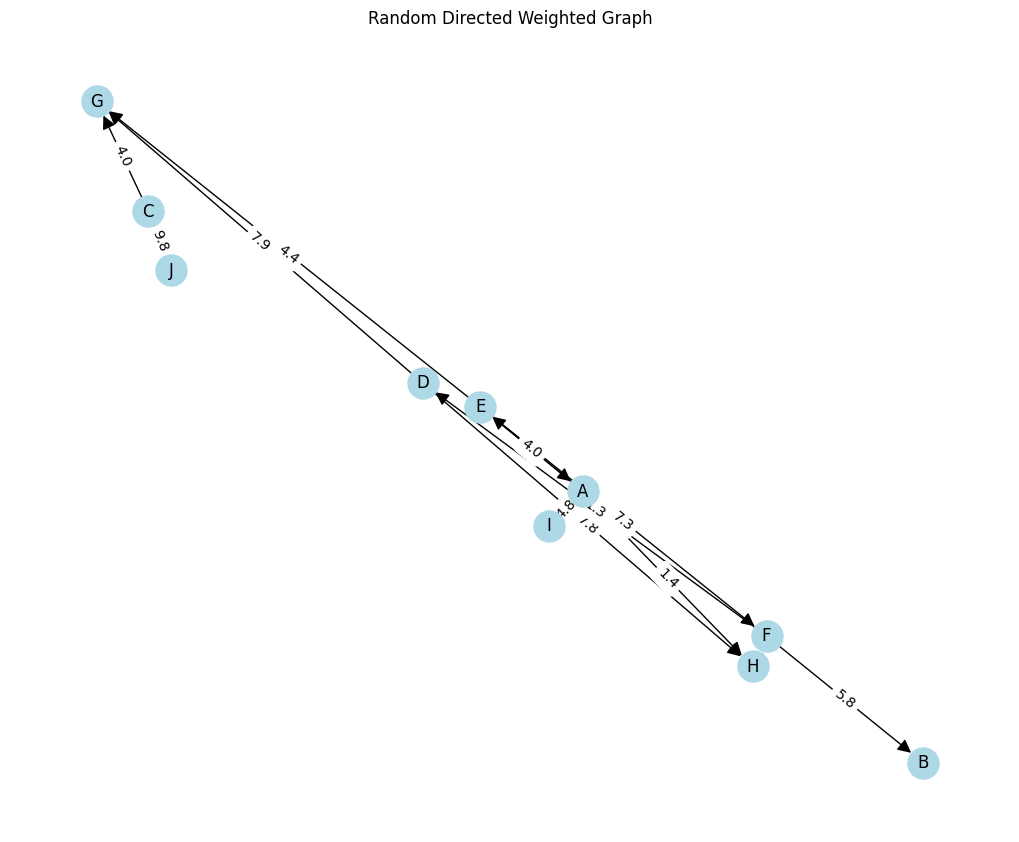

In [5]:
# Create a random directed weighted graph with 10 nodes and 15 edges
num_nodes = 10
num_edges = 15

# Create node labels A to J
node_labels = [chr(65 + i) for i in range(num_nodes)]  # ASCII values for A-J

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
G.add_nodes_from(node_labels)

# Generate random edges with weights
edges = []
for i in range(num_edges):
    # Select random source and target nodes
    source, target = random.sample(node_labels, 2)
    # Generate random weight between 1 and 10
    weight = round(random.uniform(1, 10), 1)
    edge = (source, target, weight)
    edges.append(edge)

# Add weighted edges to the graph
G.add_weighted_edges_from(edges)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, arrowsize=20)

# Display edge weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Random Directed Weighted Graph")
plt.show()

## 2. Use the graph from requirement 1 to solve these problems:
 + Display the sparse and dense adjacency matrix of this graph.
 + Display the adjacency list.
 + Calculate the graph diameter.
 + Print the number of in-edges and out-edges of a node which entered from the keyboard.
 + Write a function to print the shortest path of 2 nodes.
 + Write functions to print all in-edges and out-edges of a node.


In [7]:
# Sparse adjacency matrix
A = nx.adjacency_matrix(G)
print(A)

# Dense adjacency matrix
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

# Calculate graph diameter
# We cannot compute diameter for either 1) a connected directed graph or 2) a disconnected graph
# There are some acceptable answers:
# 1
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G, weight='weight')])
print(f"Graph diameter: {diameter}")

#2
if nx.is_connected(G.to_undirected()):
    graph_diameter = nx.diameter(G.to_undirected(), weight='weight')
    print(f"Graph diameter: {graph_diameter}")


# Get a vertex’s in-edges: 
print(f"IN-edges of node B: {G.in_degree('B')}")
# Get a vertex’s out-edges:
print(f"OUT-edges of node B: {G.out_degree('B')}")

#Shortest path of 2 nodes
def shortest_path(source, target):
    path = nx.shortest_path(G,source=source,target=target, weight='weight', method="dijkstra")

    print(f"Shortest path from {source} -> {target}: ")
    print("->".join(map(str, path)))
    
    return path

path = shortest_path("A", "B")

  (0, 4)	5.1
  (0, 7)	1.4
  (2, 6)	4.0
  (2, 9)	6.5
  (3, 6)	7.9
  (3, 7)	7.8
  (4, 0)	4.0
  (4, 5)	7.3
  (4, 6)	4.4
  (5, 1)	5.8
  (5, 3)	1.3
  (7, 5)	9.4
  (8, 0)	4.8
  (9, 2)	9.8
[[0.  0.  0.  0.  5.1 0.  0.  1.4 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  4.  0.  0.  6.5]
 [0.  0.  0.  0.  0.  0.  7.9 7.8 0.  0. ]
 [4.  0.  0.  0.  0.  7.3 4.4 0.  0.  0. ]
 [0.  5.8 0.  1.3 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  9.4 0.  0.  0.  0. ]
 [4.8 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  9.8 0.  0.  0.  0.  0.  0.  0. ]]
Graph diameter: 23.0
Graph diameter: 28.800000000000004
IN-edges of node B: 1
OUT-edges of node B: 0
Shortest path from A -> B: 
A->H->F->B


## 3. Write a program to read a file containing edge information of an undirected graph and store its dense adjacency matrix into a file.
### Input: a file has format as follow: 
Node1 Node2 Weight<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1<br />
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5<br />
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6<br />
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3<br />
4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
### Output: a file contains the dense adjacency matrix of this graph.


In [10]:
edge_file = "data/edges.txt"
adj_file = "data/adjacency.xlsx"

f = open(edge_file, "r")

edges = []
for x in f:
    edge_infor = x.split(" ")
    try:
        edge = (int(edge_infor[0]), int(edge_infor[1]), int(edge_infor[2]))
        edges.append(edge)
    except:
        continue

graph = nx.Graph()
    
graph.add_weighted_edges_from(edges)


# Adjacency matrix in Pandas format
data = nx.to_pandas_adjacency(graph)

# Store adjacency matrix into an excel file
data.to_excel(adj_file, sheet_name='data', index=False)
nx.to_pandas_adjacency(graph)

,0,1,2,5,3,4,6
0,0.0,2.0,4.0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,2.0,5.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,6.0,0.0
5,1.0,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,6.0,0.0,3.0,0.0,2.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0
